In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ Bibliothèques importées avec succès.")


✅ Bibliothèques importées avec succès.


In [2]:
print("📥 Chargement du dataset CIFAR-10...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("✅ Données chargées.")
print("🔄 Prétraitement des données...")

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("✅ Données normalisées et labels encodés.")


📥 Chargement du dataset CIFAR-10...
✅ Données chargées.
🔄 Prétraitement des données...
✅ Données normalisées et labels encodés.


In [3]:
print("🏗️ Construction du modèle CNN...")

model = Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("✅ Modèle CNN construit avec succès.\n")
model.summary()

print("\n📌 Étapes du CNN effectuées :")
print("1️⃣ Conv2D(32) + ReLU")
print("2️⃣ MaxPooling2D")
print("3️⃣ Conv2D(64) + ReLU")
print("4️⃣ MaxPooling2D")
print("5️⃣ Flatten")
print("6️⃣ Dense(128) + ReLU")
print("7️⃣ Dropout(0.5)")
print("8️⃣ Dense(10 softmax)")


🏗️ Construction du modèle CNN...
✅ Modèle CNN construit avec succès.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)


📌 Étapes du CNN effectuées :
1️⃣ Conv2D(32) + ReLU
2️⃣ MaxPooling2D
3️⃣ Conv2D(64) + ReLU
4️⃣ MaxPooling2D
5️⃣ Flatten
6️⃣ Dense(128) + ReLU
7️⃣ Dropout(0.5)
8️⃣ Dense(10 softmax)


In [4]:
print("⚙️ Compilation du modèle...")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✅ Compilation terminée.")

print("🚀 Début de l'entraînement...")
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
print("✅ Entraînement terminé.")


⚙️ Compilation du modèle...
✅ Compilation terminée.
🚀 Début de l'entraînement...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.2772 - loss: 1.9350 - val_accuracy: 0.5030 - val_loss: 1.4193
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.4715 - loss: 1.4538 - val_accuracy: 0.5598 - val_loss: 1.2300
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5298 - loss: 1.3181 - val_accuracy: 0.5977 - val_loss: 1.1535
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5687 - loss: 1.2091 - val_accuracy: 0.6337 - val_loss: 1.0693
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5974 - loss: 1.1382 - val_accuracy: 0.6363 - val_loss: 1.0376
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6199 - loss: 1.0738 - val_accuracy: 0.6580 - val_loss: 0.9834
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6314 - loss: 1.0350 - val_accuracy: 0.6666 - val_loss: 0.9527
Epoch 8/1

In [5]:
os.makedirs("saved_model", exist_ok=True)
model.save("saved_model/cnn_cifar10_model.keras")
print("💾 Modèle sauvegardé dans 'saved_model/cnn_cifar10_model.keras'")


💾 Modèle sauvegardé dans 'saved_model/cnn_cifar10_model.keras'


In [6]:
# Facultatif : pour recharger le modèle plus tard
model = load_model("saved_model/cnn_cifar10_model.keras")
print("📂 Modèle chargé depuis le fichier.")


📂 Modèle chargé depuis le fichier.


In [7]:
print("🧪 Évaluation du modèle sur les données de test...")
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"🎯 Précision : {accuracy * 100:.2f}% | Perte : {loss:.4f}")


🧪 Évaluation du modèle sur les données de test...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6860 - loss: 0.9183
🎯 Précision : 68.40% | Perte : 0.9262


📈 Affichage des courbes d'apprentissage...


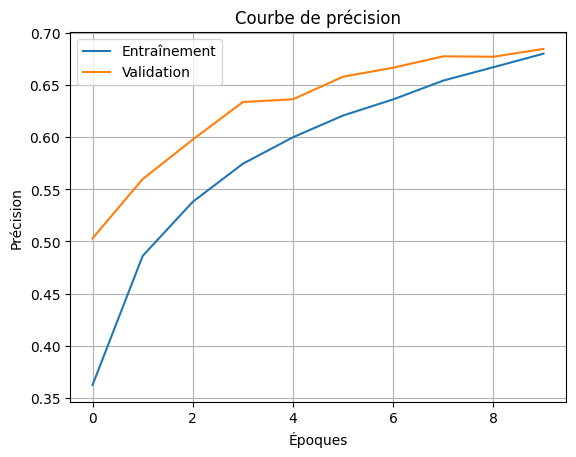

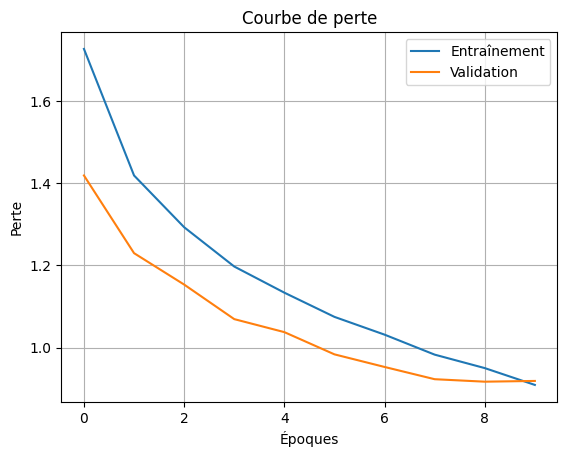

In [8]:
print("📈 Affichage des courbes d'apprentissage...")

# Courbe de précision
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Courbe de précision")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)
plt.show()

# Courbe de perte
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Courbe de perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)
plt.show()


🔍 Prédiction sur une image aléatoire...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


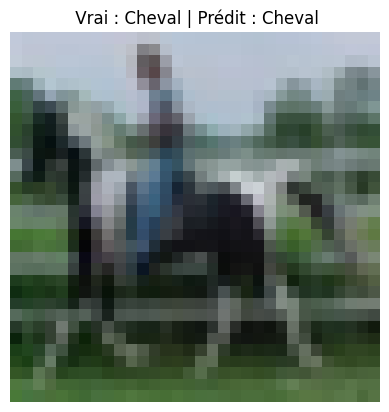

In [19]:
print("🔍 Prédiction sur une image aléatoire...")

labels = ['Avion', 'Auto', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']
index = np.random.randint(0, len(x_test))
image = x_test[index]
true_label = labels[y_test[index][0]]

prediction = model.predict(image.reshape(1, 32, 32, 3))
predicted_label = labels[np.argmax(prediction)]

plt.imshow(image)
plt.title(f" Vrai : {true_label} | Prédit : {predicted_label}")
plt.axis("off")
plt.show()
